# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.

Two equations 

* What specifically does each equation describe?

The development in ammount of susceptible over time

The development in ammount of infected over time

* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

Beta describes some kind of spreading rate or how infecteus the disease is. A small beta will mean a very infecteus disease.

Gamma reflects how long people are infected before they become susceptible again. Small gammas reflect short disease periods.


> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?

Strategy A: 75-80 pct.

Strategy B: 40 pct

Strategy C: 60 pct.


> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?

The idea is that "your friends have more friends than you"
When we randomize initially every node has the same possibility of getting picked 1/N.
When we move to the choosen nodes neighbors by picking af random link nodes with more links aka more friends suddenly has a higher possibility of getting picked.

> 3. Why is this effect larger in the BA network than in the ER network?

The BA network takes "the power law" into account, meaning nodes "prefer" to connect with nodes that already have a lot of connections. This is often observed in real-life networks including social networks. This means in a randomly created BA network there will be more so called power-hubs - strongly connected nodes. This means strategy C and strategy B will potentially be more effective here as fewer nodes carry a larger ammount of the potential disease links in the network. Vaccinating these will therefore be very effetive if they can be tracked down.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

I chose model 1. Model 1 illustrates the phenomenen of herd immunity, how immunity due to for example vaccination in a network can lead to less chance of disease spreading in the rest of the unprotected network. 
In the model it is possible to choose between several base models. The disease spreads very diffently in the three models  (I will not comment on the Lattice model), and the proctection of herd immunity is different as well. The vaccine has the greatest effect when assuming social contact is organised in a static network and least effect when mixing population. All three can all resemble real-life interactions, like mixing randomly in a supermarket, socializing un restricted or only socializing with closest relations, and so all three are relevant senarios.   
It is possible to adjust for transmissibility and vaccine uptake, and it is seen - the higher transmissibility the more need for vaccines to obtain heard immunity.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [4]:
import numpy as np

In [10]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

In [11]:
p_I = 0.1
n_iter = 200

I = set()
S = set(G.nodes())

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)

for t in range(n_iter):
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors

1) Comment on the code:

In the fist section of the code the network "G" is connected after specifications of a "caveman graph".

In the following section:
p_I determines a possibility of transmission of disease
n_iter determines an ammount of iterations

I creates an empty frame for a new set of nodes and links (Infected)
S specifies G as a set of nodes and links (Susceptible)

patient0 = .... chooses a random node from network S

I.add(patient0) adds the node patient0 to empty network I
S.remove(patient0) removes the node fra network S

The loop in steps:

The loop is a "for loop" looping through the list of infected nodes initially containing only patientzero but constantly added to. An ammount of iterations is determined beforehand. 

Finds the neighbors to the infected node

Determines wheter these nodes are infected by a possibility p_I

Adds nodes to the Infected group if determined infected in previous step

Removes node from the Susceptible if determined infected in previous step

In [47]:
# Adapt the code to be able to plot fraction of infected over time.

p_I = 0.1
n_iter = 200

I = set()
S = set(G.nodes())
I_count = []
n = []
i= 1

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)

for t in range(n_iter):
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors
    I_count.append(len(I))

  
        
    


In [36]:
print(I_count)

[1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 9, 10, 12, 14, 14, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 20, 21, 21, 22, 23, 23, 24, 24, 26, 26, 27, 28, 28, 28, 29, 29, 32, 33, 34, 35, 37, 37, 37, 37, 37, 37, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 42, 43, 44, 46, 47, 48, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


In [37]:
len(I_count)

200

In [15]:
len(G)

50

In [33]:
#Plot of fraction 

import numpy as np

fraction = np.divide(I_count, 50)

print(fraction)

[0.02 0.02 0.04 0.04 0.08 0.08 0.1  0.1  0.12 0.12 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.14 0.18 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.22 0.22 0.22 0.22 0.24 0.28 0.3  0.32 0.34 0.34 0.34
 0.34 0.36 0.38 0.38 0.38 0.38 0.4  0.4  0.44 0.46 0.48 0.5  0.52 0.54
 0.54 0.56 0.58 0.6  0.6  0.62 0.68 0.7  0.7  0.7  0.72 0.72 0.72 0.72
 0.72 0.74 0.76 0.78 0.82 0.88 0.9  0.92 0.94 0.94 0.96 0.98 0.98 0.98
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.  ]


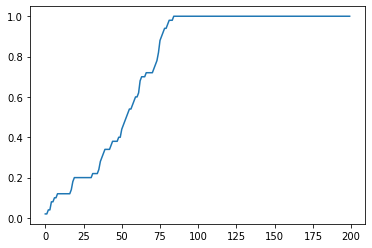

In [49]:
plt.plot(fraction)

3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [50]:
class RingBuffer:
    def __init__(self, length):
        self.length = length
        self.data = [None]*length
    def add(self, value):
        if len(self.data) < self.length:
            self.data.insert(2,value)
        else:
            self.data = self.data[:-3]
            self.data.insert(2,value)
    def take(self):
        return self.data.pop()

In [ ]:


p_I = 0.1
n_iter = 200
T_I = 10

I = set()
S = set(G.nodes())
I_count = []
rb = Ringbuffer(T_I)
new_infections = []


patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)

for t in range(n_iter):
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        
        
        
        #How do I implement the ringbuffer?
        
        
        for i in range(T_I):
        rb.add(new_infections)
        recoveries = rb.take()   
        
        
        
            I |= infected_neighbors
            S -= infected_neighbors
        I_count.append(len(I))
      
        
  

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [77]:
#Load facebook data into network

import pandas as pd
data = pd.read_csv(
    "facebook-wall.txt.anon",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


In [78]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
F = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.Graph)

##### I never got the SIRS model to function and therefore apply the SIR model

In [79]:

# Adapt the code to be able to plot fraction of infected over time.

p_I = 0.1
n_iter = 200

I = set()
S = set(F.nodes())
I_count = []
S_count = []

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)

for t in range(n_iter):
    for infected_node in list(I):
        neighbors = F.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors
    I_count.append(len(I))
    S_count.append(len(S))




In [80]:
len(G)

10309

In [81]:
print(I_count)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 6, 7, 8, 10, 11, 12, 13, 13, 14, 16, 17, 17, 17, 19, 19, 21, 22, 22, 22, 23, 23, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


In [82]:
len(I_count)

200

In [83]:
print(S_count)

[10308, 10308, 10308, 10308, 10308, 10308, 10308, 10308, 10308, 10307, 10307, 10307, 10307, 10306, 10306, 10306, 10306, 10306, 10306, 10306, 10306, 10306, 10306, 10306, 10305, 10305, 10304, 10303, 10303, 10302, 10301, 10299, 10298, 10297, 10296, 10296, 10295, 10293, 10292, 10292, 10292, 10290, 10290, 10288, 10287, 10287, 10287, 10286, 10286, 10285, 10285, 10284, 10284, 10284, 10284, 10284, 10284, 10284, 10284, 10283, 10283, 10283, 10283, 10282, 10282, 10281, 10281, 10281, 10281, 10281, 10281, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10280, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279, 10279

In [85]:
fraction_I = np.divide(I_count, len(F))

In [86]:
fraction_S = np.divide(S_count, len(F))

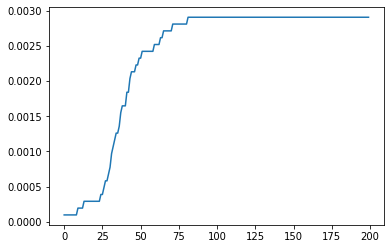

In [88]:
plt.plot(fraction_I)

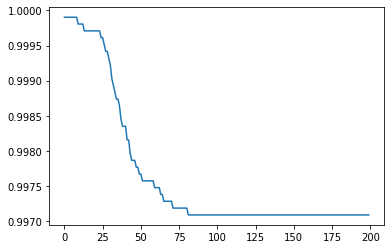

In [89]:
plt.plot(fraction_S)

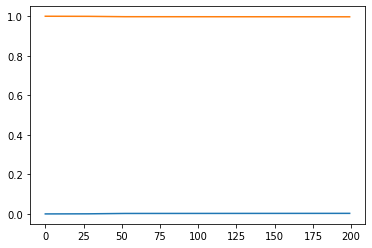

In [94]:
plt.plot(fraction_I)
plt.plot(fraction_S)

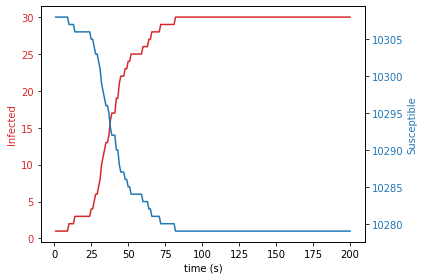

In [103]:
X = np.linspace(1, 200, 200)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Infected', color=color)
ax1.plot(X, I_count, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Susceptible', color=color)  # we already handled the x-label with ax1
ax2.plot(X, S_count, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

It is noticed that the epidemic "dies out" at about 30 cases. 

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.